In [78]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries
!pip install matplotlib deap

In [79]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools

In [80]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations = 15 # Define the number of locations (eg 10)

locations =[((random.randint(0,50)),(random.randint(0,50))) for i in range(num_locations)] # Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot =(9,10) # Define the coordinates for the depot

num_vehicles = 3# Define the number of vehicles - (eg 3)

In [81]:
print(locations)

[(6, 26), (37, 30), (36, 43), (28, 11), (39, 24), (49, 22), (39, 1), (43, 46), (8, 30), (31, 7), (26, 28), (2, 4), (16, 41), (20, 0), (45, 43)]


In [82]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [83]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [84]:
# TASK 5 and 6
def calculate_distance(l1,l2):
  return((((l1[0]-l2[0])**2)+(l1[1]-l2[1])**2)**0.5)

def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = 0
        current_location = depot
        for location in vehicle_route[1:]:
            vehicle_distance += calculate_distance(current_location, location)
            current_location = location


        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)


    # TODO: Task 5 - Write the fitness evaluation function
    #              - Return (total distance, standard deviation)



#TASK 6 - Register the evaluate function in the toolbox

In [85]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate",tools.cxPartialyMatched) # Choose and configure a crossover method
toolbox.register("mutate",tools.mutShuffleIndexes, indpb=0.1) # Choose and configure a mutation method
toolbox.register("select",tools.selTournament, tournsize=3) # Choose and configure a selection method

In [86]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

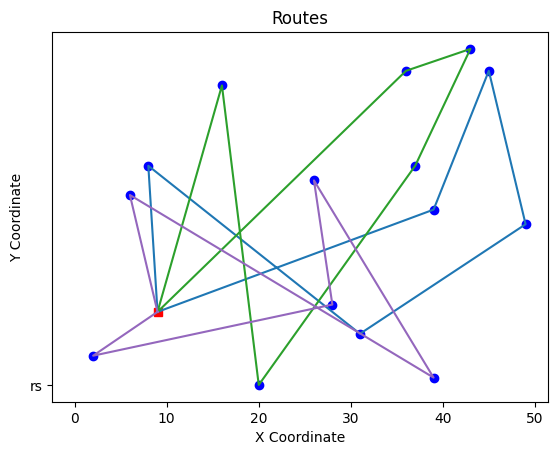

In [87]:
plot_routes(toolbox.individual())

gen	nevals	avg    	min    
0  	300   	270.703	1.19477
1  	239   	261.078	1.34643
2  	236   	254.332	1.5015 
3  	225   	250.289	1.5015 
4  	230   	248.016	0.443728
5  	241   	245.276	1.62962 
6  	217   	239.504	1.62962 
7  	230   	240.887	0.727447
8  	228   	238.589	0.727447
9  	223   	237.753	0.703447
10 	217   	233.055	0.673316
11 	233   	234.031	0.699864
12 	221   	230.416	0.588222
13 	219   	229.251	0.699864
14 	227   	225.361	1.36046 
15 	231   	225.507	1.36046 
16 	224   	228.958	1.28432 
17 	214   	220.275	1.29866 
18 	222   	216.33 	1.30277 
19 	223   	208.608	1.98635 
20 	251   	204.127	0.147995
21 	230   	198.831	0.509142
22 	235   	196.342	1.77979 
23 	226   	194.481	2.36587 
24 	220   	189.241	2.66043 
25 	231   	187.38 	2.23013 
26 	232   	183.74 	3.11066 
27 	231   	183.026	4.17822 
28 	240   	183.978	2.30077 
29 	238   	183.176	2.88146 
30 	226   	181.191	3.29036 
31 	234   	180.126	1.77465 
32 	221   	175.239	5.13262 
33 	228   	175.968	1.65751 
34 	225   	172.563	2.2467

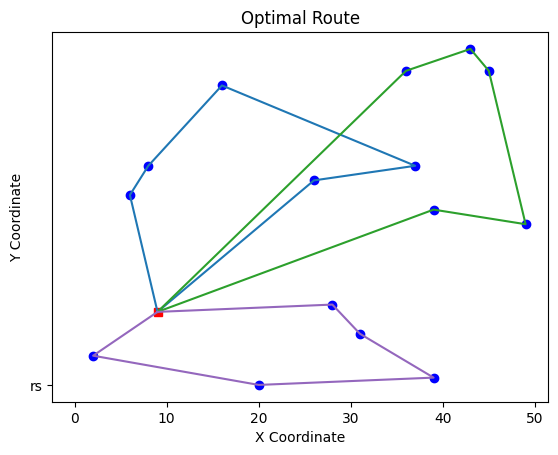

In [89]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
from deap  import algorithms
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()
    # TODO: Task 9 -  print the results